<a href="https://colab.research.google.com/github/fmuranda/Climate_Science-/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial5.ipynb) &nbsp; <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial5.ipynb" target="_parent"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open in Kaggle"/></a>

# Tutorial 5: Xarray Data Analysis and Climatology

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Paul Heubel, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Paul Heubel, Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Paul Heubel, Jenna Pearson, Konstantine Tsafatinos, Chi Zhang, Ohad Zivan

**Our 2024 Sponsors:** CMIP, NFDI4Earth

## ![project pythia](https://projectpythia.org/_static/images/logos/pythia_logo-blue-rtext.svg)

Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851

## ![CMIP.png](https://github.com/ClimateMatchAcademy/course-content/blob/main/tutorials/Art/CMIP.png?raw=true)


# Tutorial Objectives

*Estimated timing of tutorial:* 25 minutes

Global climate can vary on long timescales, but it's also important to understand seasonal variations. For example, seasonal variations in precipitation associated with the migration of the [Intertropical Convergence Zone (ITCZ)](https://glossary.ametsoc.org/wiki/Intertropical_convergence_zone#:~:text=(Also%20called%20ITCZ%2C%20equatorial%20convergence,and%20Northern%20Hemispheres%2C%20respectively).) and monsoon systems occur in response to seasonal changes in temperature. In this tutorial, we will use data analysis tools in Xarray to explore the seasonal climatology of global temperature. Specifically, in this tutorial, we'll use the `.groupby()` operation in Xarray, which involves the following steps:

- **Split**: group data by value (e.g., month).
- **Apply**: compute some function (e.g., aggregate) within the individual groups.
- **Combine**: merge the results of these operations into an output dataset.

# Setup


In [1]:
# installations ( uncomment and run this cell ONLY when using google colab or kaggle )
!pip install pythia_datasets cftime nc-time-axis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.4 MB/s eta 0:00:00


In [2]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import matplotlib.pyplot as plt

In [3]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W1D1_T5"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.2 MB/s eta 0:00:00


In [4]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [5]:
# @title Video 1: Terrestrial Temperature and Rainfall

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
  def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
    self.id = id
    if source == 'Bilibili':
      src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
    elif source == 'Osf':
      src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
    super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
  tab_contents = []
  for i, video_id in enumerate(video_ids):
    out = widgets.Output()
    with out:
      if video_ids[i][0] == 'Youtube':
        video = YouTubeVideo(id=video_ids[i][1], width=W,
                             height=H, fs=fs, rel=0)
        print(f'Video available at https://youtube.com/watch?v={video.id}')
      else:
        video = PlayVideo(id=video_ids[i][1], source=video_ids[i][0], width=W,
                          height=H, fs=fs, autoplay=False)
        if video_ids[i][0] == 'Bilibili':
          print(f'Video available at https://www.bilibili.com/video/{video.id}')
        elif video_ids[i][0] == 'Osf':
          print(f'Video available at https://osf.io/{video.id}')
      display(video)
    tab_contents.append(out)
  return tab_contents


video_ids = [('Youtube', 'SyvFyT3jVM8'), ('Bilibili', 'BV1PhbyeaEMk')]
tab_contents = display_videos(video_ids, W=730, H=410)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
  tabs.set_title(i, video_ids[i][0])
display(tabs)

In [6]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Terrestrial_Temperature_Rainfall_Video")

In [7]:
# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "9z6km"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/9z6km/


In [8]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Terrestrial_Temperature_Rainfall_Slides")

# Section 1: GroupBy: Split, Apply, Combine

Simple aggregations (as we learned in the previous Tutorial 4) can give a useful summary of our dataset, but often we would prefer to aggregate conditionally on some coordinate labels or groups. Xarray provides the so-called `.groupby()` operation which enables the **split-apply-combine** workflow on Xarray DataArrays and Datasets. The split-apply-combine operation is illustrated in this figure from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html):

<img src="https://github.com/neuromatch/climate-course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/student/images/t5_split_apply_combine.png?raw=1" alt="split-apply-combine" class="bg-primary" width="100%">

- The **split** step involves breaking up and grouping an Xarray Dataset or DataArray depending on the value of the specified group key.
- The **apply** step involves computing some function, usually an aggregate, transformation, or filtering, within the individual groups.
- The **combine** step merges the results of these operations into an output Xarray Dataset or DataArray.

We are going to use `.groupby()` to remove the seasonal cycle ("climatology") from our dataset, which will allow us to better observe long-term trends in the data. See the [xarray groupby user guide](https://xarray.pydata.org/en/stable/user-guide/groupby.html) for more examples of what `.groupby()` can take as an input.

Let's start by loading the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [9]:
filepath = DATASETS.fetch("CESM2_sst_data.nc")
ds = xr.open_dataset(filepath)
ds

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:204: SerializationWarning: variable 'tos' has multiple fill values {np.float32(1e+20), np.float64(1e+20)} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 47MB
Dimensions:    (time: 180, d2: 2, lat: 180, lon: 360)
Coordinates:
  * time       (time) object 1kB 2000-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Dimensions without coordinates: d2
Data variables:
    time_bnds  (time, d2) object 3kB ...
    lat_bnds   (lat, d2) float64 3kB ...
    lon_bnds   (lon, d2) float64 6kB ...
    tos        (time, lat, lon) float32 47MB ...
Attributes: (12/45)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    sub_experiment_id:      none
    table_id:               Omon
    tracking_id:            hdl:21.14100/2975ffd3-1d7b-47e3-961a-33f212ea4eb2
    variable_id:            tos
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1

Then, let's select a gridpoint closest to a specified lat-lon (in this case let's select 50ºN, 310ºE), and plot a time series of SST at that point (recall that we learned this in Tutorial 2). The annual cycle will be quite pronounced. Note that we are using the `nearest` method to find the points in our datasets closest to the lat-lon values we specify. What this returns may not match these inputs exactly.

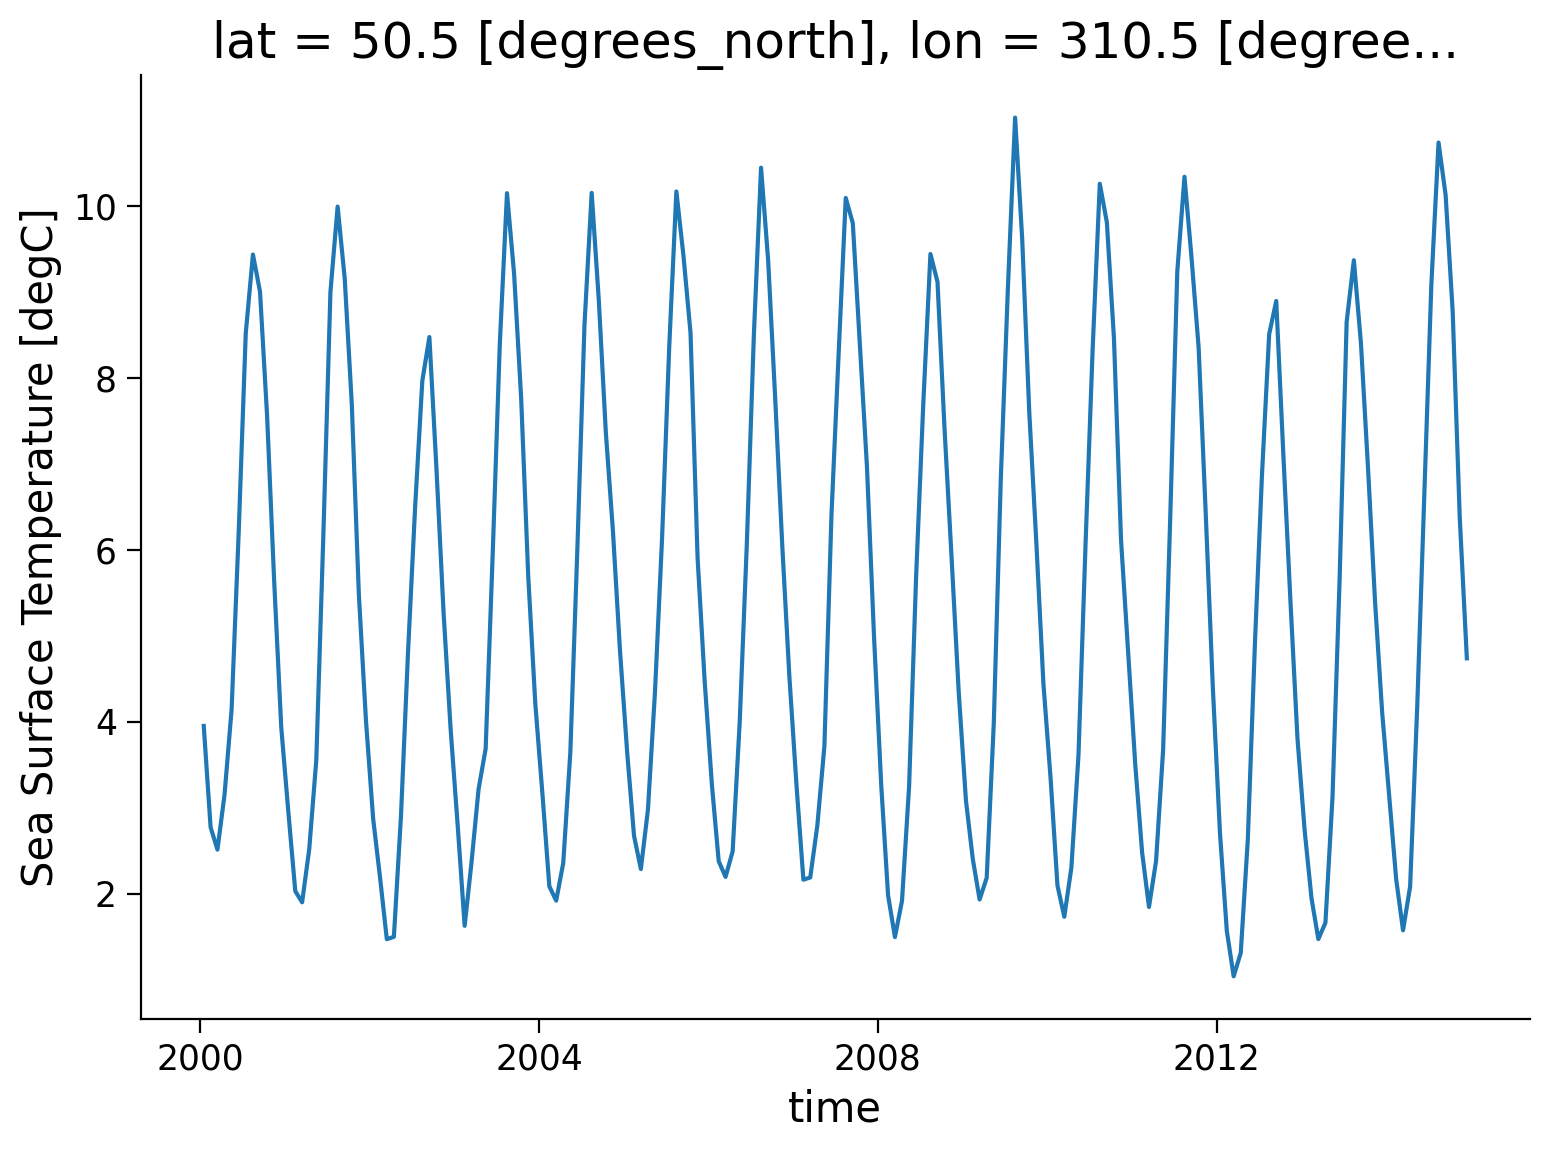

In [10]:
ds.tos.sel(
    lon=310, lat=50, method="nearest"
).plot()  # time range is 2000-01-15 to 2014-12-15

This plot shows changes in monthly SST between 2000-01-15 and 2014-12-15. The annual cycle of SST change is apparent in this figure, but to understand the climatology of this region, we need to calculate the average SST for each month over this period. The first step is to split the data into groups based on month.

## Section 1.1: Split

Let's group data by month, i.e. all Januaries in one group, all Februaries in one group, etc.


In [11]:
ds.tos.groupby(ds.time.dt.month)

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

<div class="admonition alert alert-info">

In the above code, we are using the `.dt` [`DatetimeAccessor`](https://xarray.pydata.org/en/stable/generated/xarray.core.accessor_dt.DatetimeAccessor.html) to extract specific components of dates/times in our time coordinate dimension. For example, we can extract the year with `ds.time.dt.year`. See also the equivalent [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html).
    
   </div>

Xarray also offers a more concise syntax when the variable you’re grouping on is already present in the dataset. This is identical to `ds.tos.groupby(ds.time.dt.month)`:

In [12]:
ds.tos.groupby("time.month")

<DataArrayGroupBy, grouped over 1 grouper(s), 12 groups in total:
    'month': 12/12 groups present with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12>

## Section 1.2: Apply & Combine

Now that we have groups defined, it’s time to “apply” a calculation to the group. These calculations can either be:

- aggregation: reduces the size of the group
- transformation: preserves the group’s full size

At the end of the apply step, Xarray will automatically combine the aggregated/transformed groups back into a single object.


### Section 1.2.1: Compute the Climatology


Let's calculate the climatology at every point in the dataset. To do so, we will use aggregation and will calculate the mean SST for each month:


In [13]:
tos_clim = ds.tos.groupby("time.month").mean()
tos_clim

<xarray.DataArray 'tos' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.780786 , -1.780688 , -1.7805718, ..., -1.7809757,
         -1.7809197, -1.7808627],
        [-1.7745041, -1.7744204, -1.7743237, ..., -1.77467  ,
         -1.774626 , -1.7745715],
        [-1.7691481, -1.7690798, -1.7690051, ..., -1.7693441,
         -1.7692844, -1.7692182]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7605033, -1.760397 , -1.7602725, ..., -1.760718 ,
         -1.7606541, -1.7605885],
        [-1.7544289, -1.7543424, -1.7542422, ..., -1.754608 ,
         -1.754559 , -1.7545002],
        [-1.7492163, -1.749148 , -1.7490736, ..., -1.7494118,
         -1.7493519, -1.7492864]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7711828, -1.7710832, -1.7709653, ..., -1.7713748,
         -1.7713183, -1.7712607],
        [-1.7648666, -1.7647841, -1.7646879, ..., -1.7650299,
         -1.7649865, -1.7649331],
        [-1.759478 , -1.7594113, -1.7593384, ..., -1.7596704,
         -1.7596117, -1.759547 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes: (12/19)
    cell_measures:  area: areacello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    description:    This may differ from "surface temperature" in regions of ...
    frequency:      mon
    id:             tos
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Sea Surface Temperature
    type:           real
    units:          degC
    variable_id:    tos

For every spatial coordinate, we now have a monthly mean SST for the time period 2000-01-15 to 2014-12-15.

We can now plot the climatology at a specific point:

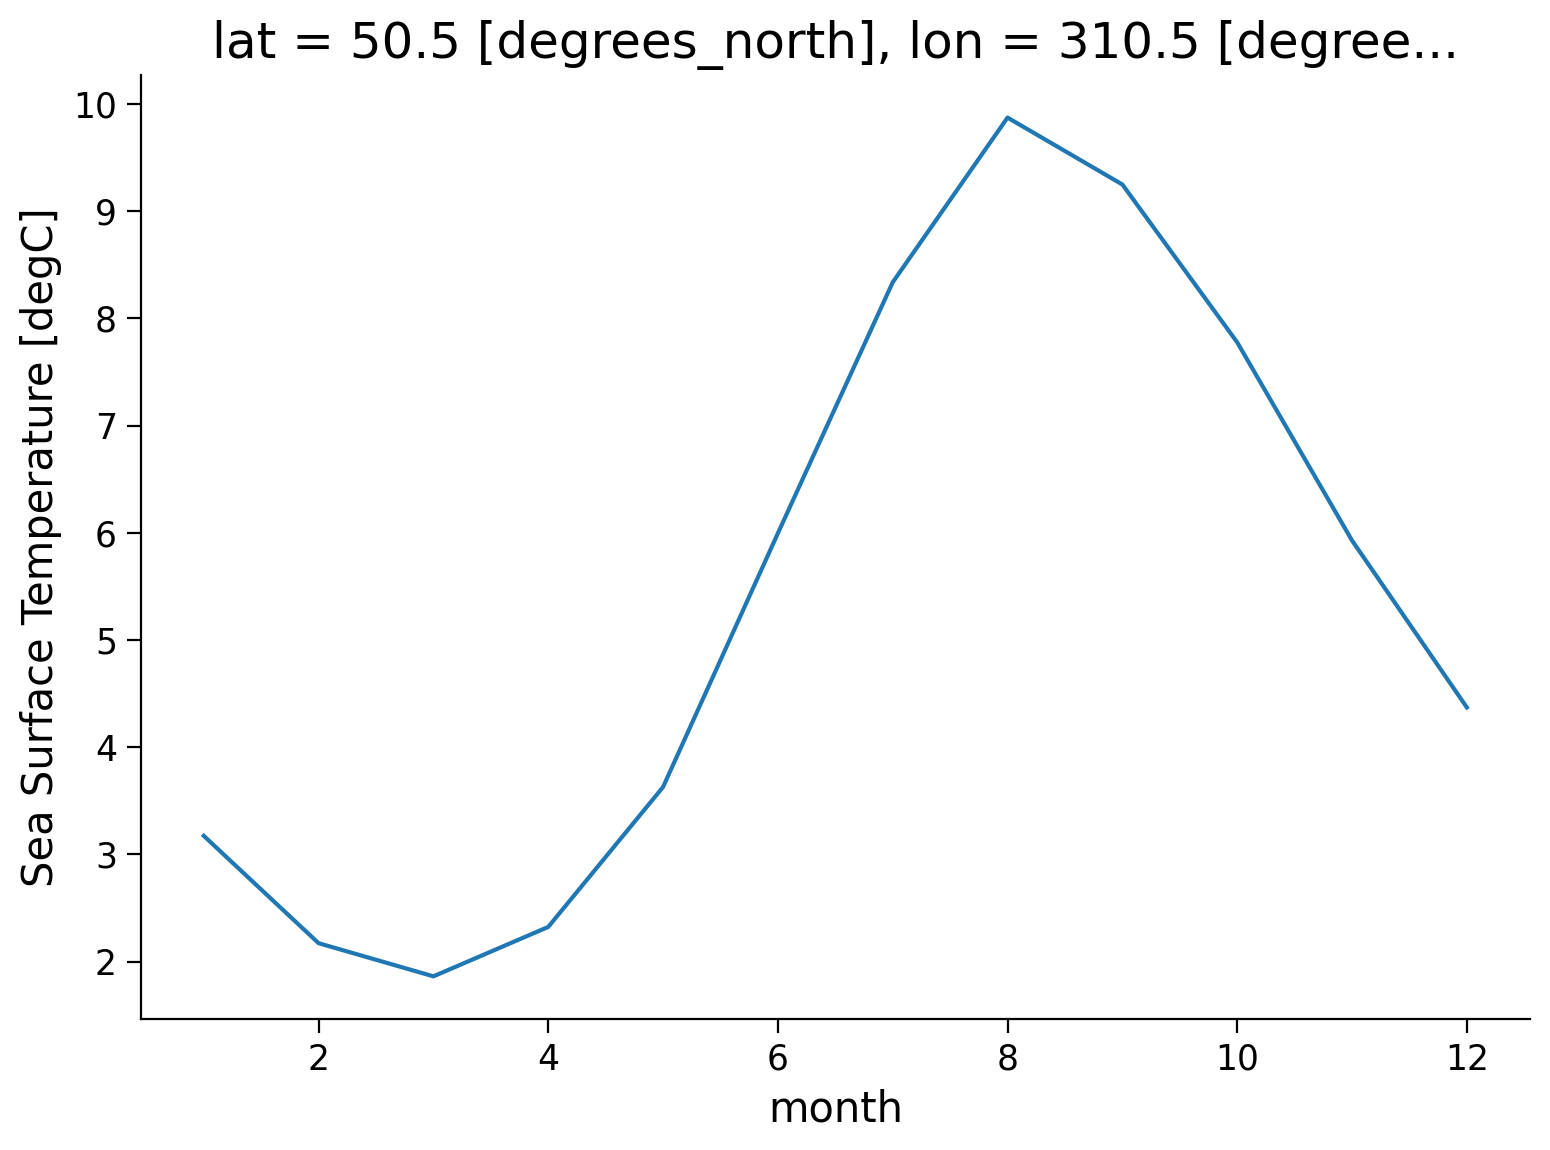

In [14]:
tos_clim.sel(lon=310, lat=50, method="nearest").plot()

Based on this plot, the climatology of this location is defined by cooler SST from December to April and warmer SST from June to October, with an annual SST range of ~8ºC.

#### Questions 1.2.1: Climate Connection

1. Considering the latitude and longitude of this data, can you explain why we observe this climatology?
2. How do you think seasonal variations in SST would differ at the equator? What about at the poles? What about at 50ºS?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial5_Solution_79c64ee7.py)



In [15]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1_2_1")

### Section 1.2.2: Spatial Variations

We can now add a spatial dimension to this plot and look at the zonal mean climatology (the monthly mean SST at different latitudes):

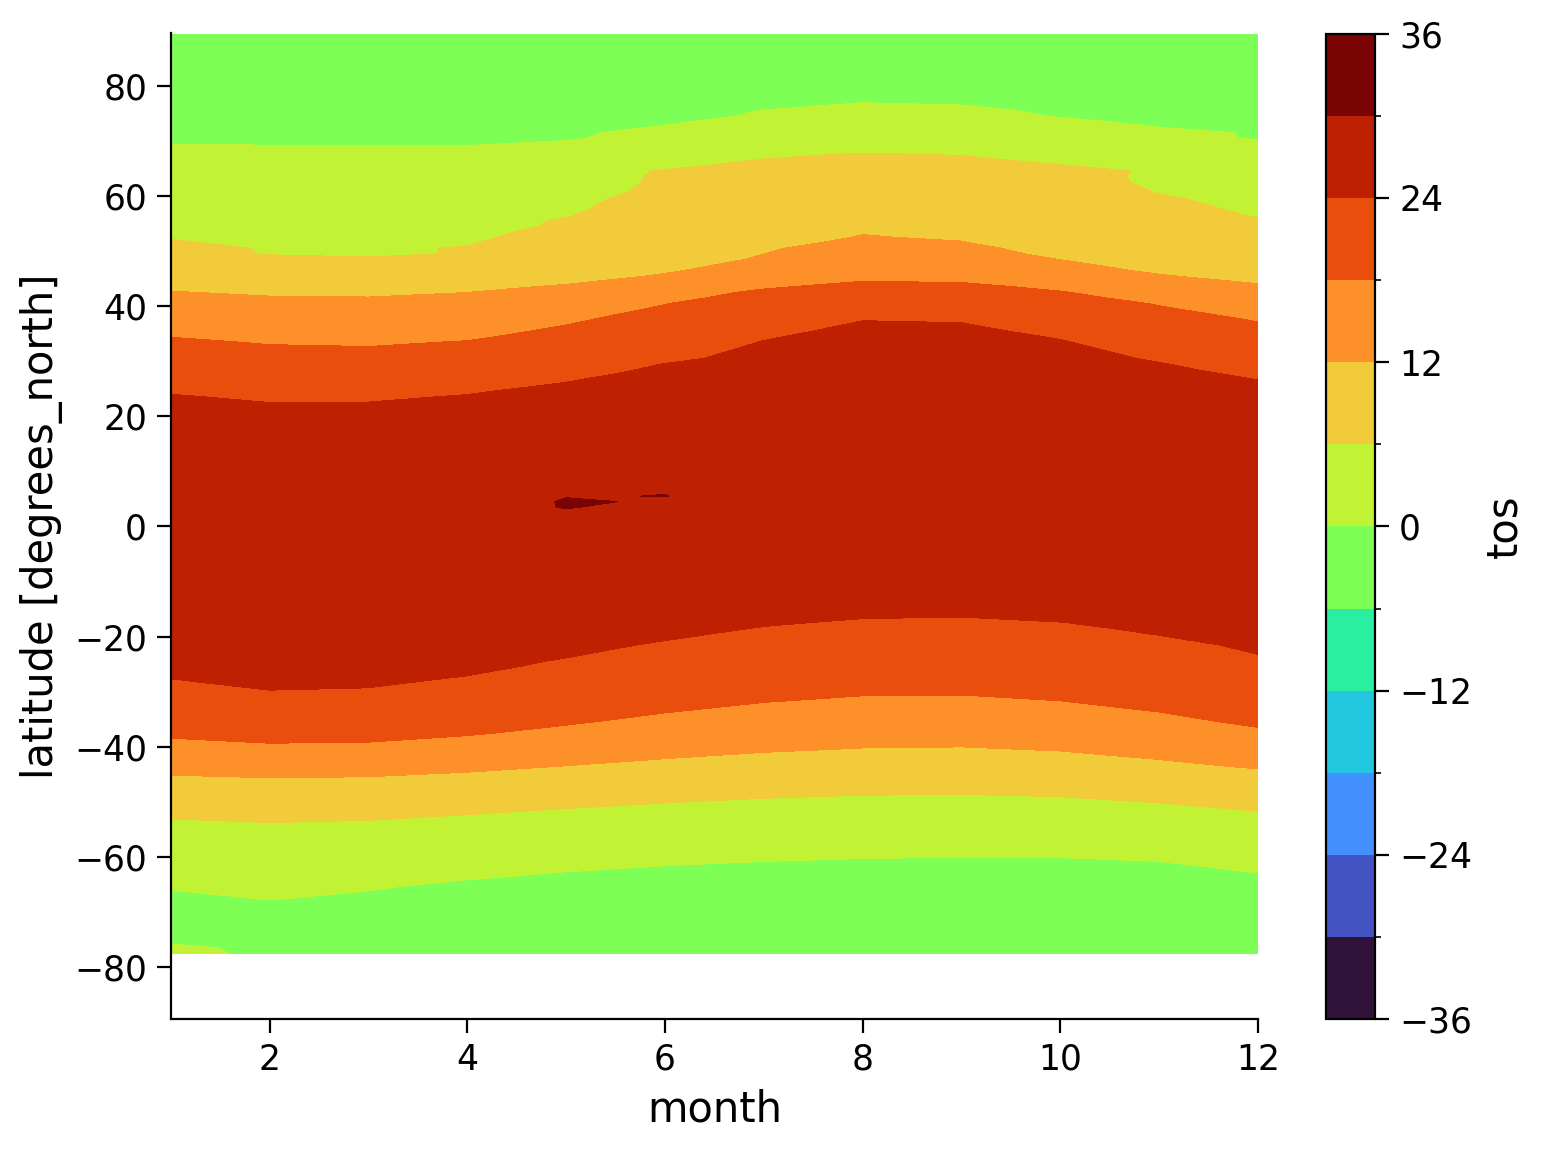

In [16]:
tos_clim.mean(dim="lon").transpose().plot.contourf(levels=12, cmap="turbo")

This gives us helpful information about the mean SST for each month, but it's difficult to asses the range of monthly temperatures throughout the year using this plot.

To better represent the range of SST, we can calculate and plot the difference between January and July climatologies:

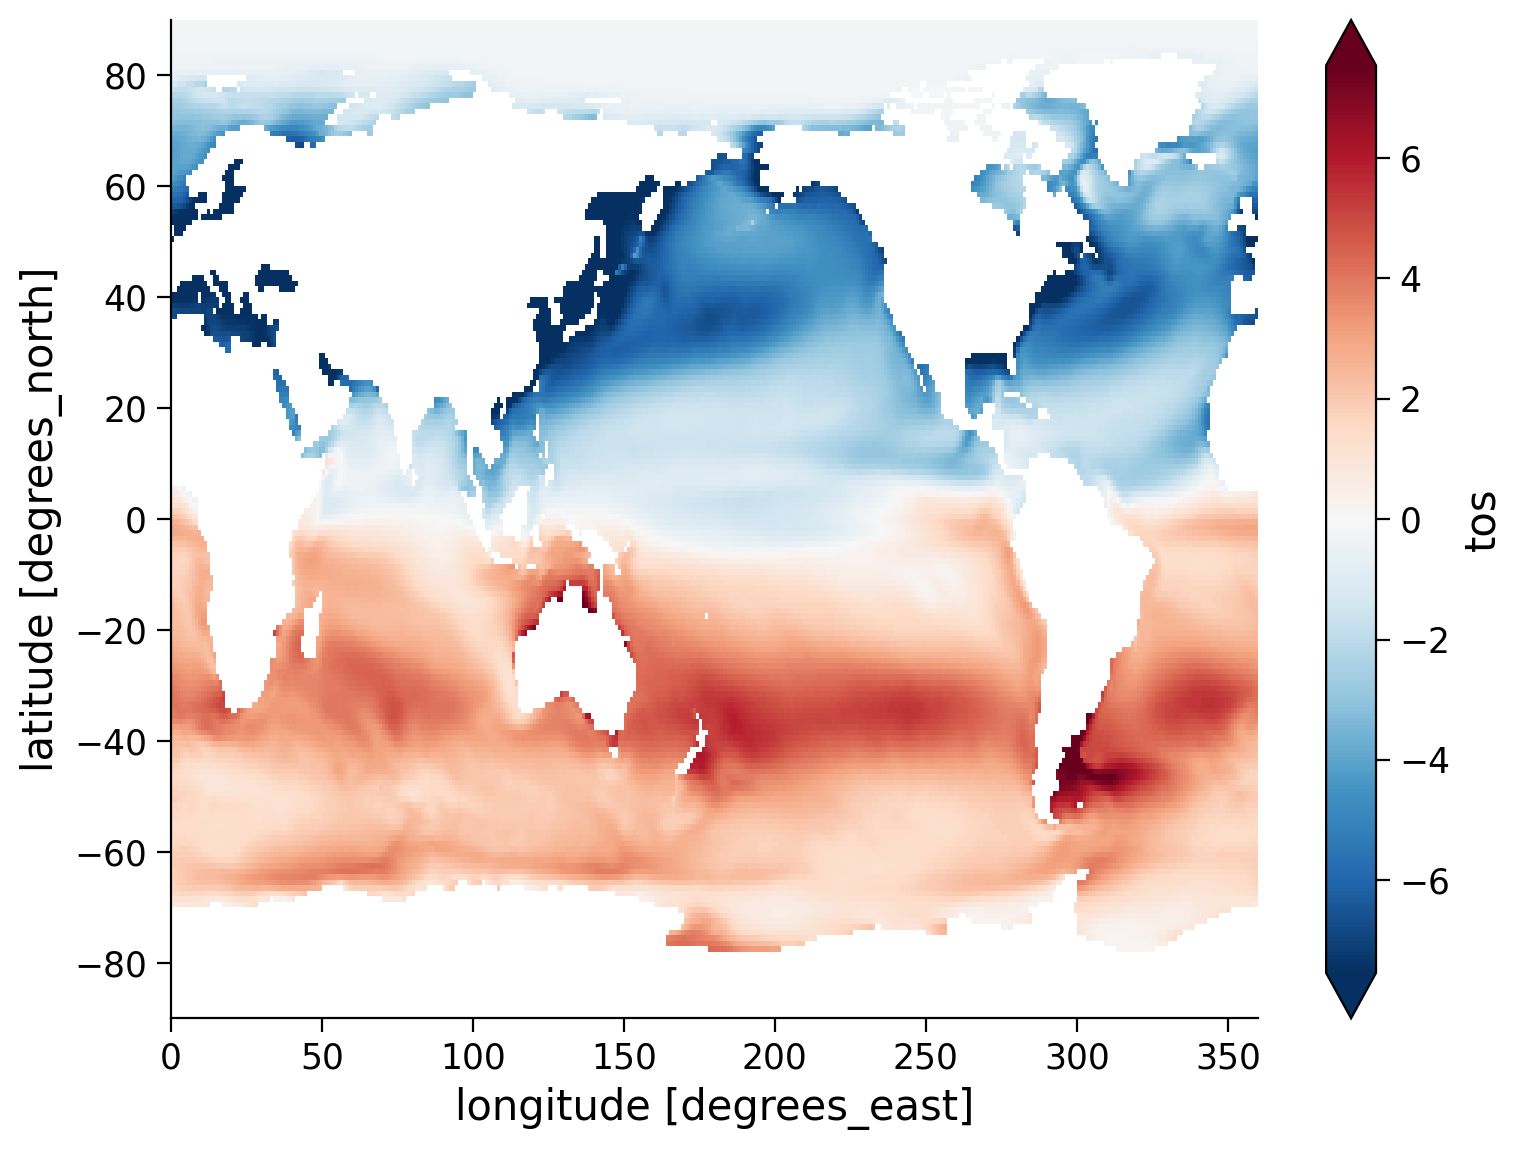

In [17]:
(tos_clim.sel(month=1) - tos_clim.sel(month=7)).plot(size=6, robust=True)

#### Questions 1.2.2: Climate Connection

1. What patterns do you observe in this map?
2. Why is there such an apparent difference between the Northern and Southern Hemisphere SST changes?
3. How does the migration of the ITCZ relate to seasonal changes in Northern vs. Southern Hemisphere temperatures?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W1D1_ClimateSystemOverview/solutions/W1D1_Tutorial5_Solution_11d6af2a.py)



In [18]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1_2_2")

# Summary

In this tutorial, we focused on exploring seasonal climatology in global temperature data using the split-apply-combine approach in Xarray. By utilizing the split-apply-combine approach, we gained insights into the seasonal climatology of temperature and precipitation data, enabling us to analyze and understand the seasonal variations associated with global climate patterns.




# Resources

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).